<a href="https://colab.research.google.com/github/raghava0071/job-market-intelligence-dashboard/blob/main/job_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🚀 PROJECT: Real-Time Job Market Intelligence Dashboard**

In [ ]:
pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


requests: to send an HTTP request to the job site.

BeautifulSoup: to parse the HTML response from the site.

pandas: to create and export data into a structured format (CSV).

**bold text**

In [ ]:
url = "https://remoteok.com/remote-data+scientist-jobs"


**Step 3: Request the Web Page**

In [ ]:
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)


**Step 4: Parse HTML with BeautifulSoup**

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")


**Step 5: Find All Job Rows**

In [ ]:
jobs = soup.find_all("tr", class_="job")


**Step 6: Extract Job Info**

In [ ]:
for job in jobs:
    title = job.find("h2", itemprop="title").text.strip()
    company = job.find("h3", itemprop="name").text.strip()
    location_tag = job.find("div", class_="location")
    location = location_tag.text.strip() if location_tag else "Remote"


**Step 7: Create DataFrame and Save as CSV**

In [ ]:
import requests
import pandas as pd

url = "https://jsearch.p.rapidapi.com/search"

# Replace 'your-api-key-here' with the actual API key you got
headers = {
    "X-RapidAPI-Key": "your-api-key-here",
    "X-RapidAPI-Host": "jsearch.p.rapidapi.com"
}

# Parameters for the API: change "Data Scientist" and location as needed
querystring = {
    "query": "Data Scientist",
    "page": "1",
    "num_pages": "1"
}

response = requests.get(url, headers=headers, params=querystring)

# Check status
print("Status Code:", response.status_code)

# Parse JSON response
data = response.json()
jobs = data.get('data', [])

# Extract fields
job_list = []
for job in jobs:
    job_list.append({
        "Job Title": job.get("job_title"),
        "Company": job.get("employer_name"),
        "Location": job.get("job_city"),
        "Remote": job.get("job_is_remote"),
        "Job Description": job.get("job_description")
    })

# Convert to DataFrame
df = pd.DataFrame(job_list)
df.to_csv("jsearch_jobs.csv", index=False)

print("✅ Jobs extracted from JSearch API. Here's a preview:")
df.head()


Status Code: 403
✅ Jobs extracted from JSearch API. Here's a preview:


""


In [ ]:
import requests
import pandas as pd
from datetime import datetime

url = "https://jsearch.p.rapidapi.com/search"

headers = {
    "X-RapidAPI-Key": "your-api-key-here",  # Replace this
    "X-RapidAPI-Host": "jsearch.p.rapidapi.com"
}

querystring = {
    "query": "Data Analyst",
    "page": "1",
    "num_pages": "3",
    "country": "US"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

jobs = data.get('data', [])
print("Total jobs fetched:", len(jobs))

filtered_jobs = []
today = datetime.utcnow()
days_range = 15

for job in jobs:
    posted_at = job.get("job_posted_at_datetime_utc")
    if not posted_at:
        continue
    try:
        posted_date = datetime.strptime(posted_at, "%Y-%m-%dT%H:%M:%S.%fZ")
        days_ago = (today - posted_date).days
        if days_ago <= days_range:
            filtered_jobs.append({
                "Job Title": job.get("job_title"),
                "Company": job.get("employer_name"),
                "Location": job.get("job_city"),
                "Remote": job.get("job_is_remote"),
                "Posted Days Ago": days_ago,
                "Job Description": job.get("job_description")
            })
    except Exception as e:
        print("Date parsing error:", e)

df = pd.DataFrame(filtered_jobs)
df.to_csv("recent_data_analyst_jobs.csv", index=False)

print(f"\n✅ Found {len(df)} jobs posted in the last {days_range} days.")
df.head()


Total jobs fetched: 0

✅ Found 0 jobs posted in the last 15 days.


""


In [ ]:
print(response.status_code)
print(response.text)


429
{"message":"Too many requests"}


In [ ]:
import requests

url = "https://jsearch.p.rapidapi.com/search"
headers = {
    "X-RapidAPI-Key": "3fbaa47488msh660a07cdf52b73ap143978jsn9af97fac883b",
    "X-RapidAPI-Host": "jsearch.p.rapidapi.com"
}
params = {
    "query": "Data Analyst",
    "page": "1",
    "num_pages": "3",
    "country": "US"
}

response = requests.get(url, headers=headers, params=params)
print(response.status_code)
print(response.json())  # You get structured JSON


200
{'status': 'OK', 'request_id': '748bf842-db30-41d2-8b1b-c6a406708a92', 'parameters': {'query': 'Data Analyst', 'page': 1, 'num_pages': 3, 'country': 'us', 'language': 'en'}, 'data': [{'job_id': 'RACLFm0ygZLTJYXKAAAAAA==', 'job_title': 'Data Analyst Associate (early career) - Data Retention', 'employer_name': 'Lensa', 'employer_logo': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0EfPVHF5N0I08Ioa1WKZDYxcfrJkurRgwcHI5&s=0', 'employer_website': 'https://lensa.com', 'job_publisher': 'LinkedIn', 'job_employment_type': 'Full-time', 'job_employment_types': ['FULLTIME'], 'job_apply_link': 'https://www.linkedin.com/jobs/view/data-analyst-associate-early-career-data-retention-at-lensa-4264709404?utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic', 'job_apply_is_direct': False, 'apply_options': [{'publisher': 'LinkedIn', 'apply_link': 'https://www.linkedin.com/jobs/view/data-analyst-associate-early-career-data-retention-at-lensa-4264709404?utm_campaign=go

In [ ]:
# Let's assume you already ran this and have a valid response
data = response.json()

# Extract job data from the response
jobs = data.get('data', [])
print(f"Total jobs found: {len(jobs)}")

# Convert to DataFrame with basic fields
import pandas as pd

df = pd.DataFrame([{
    "Job Title": job.get("job_title"),
    "Company": job.get("employer_name"),
    "Location": job.get("job_city"),
    "Remote": job.get("job_is_remote"),
    "Job Description": job.get("job_description")
} for job in jobs])

# Save to CSV
df.to_csv("raw_job_data.csv", index=False)
print("✅ Job data saved to 'raw_job_data.csv'")
df.head()


Total jobs found: 30
✅ Job data saved to 'raw_job_data.csv'


,Job Title,Company,Location,Remote,Job Description
0,Data Analyst Associate (early career) - Data R...,Lensa,Arlington,False,Lensa is a career site that helps job seekers ...
1,Senior Business and Data Analyst,Strategi Consulting,Chevy Chase,False,Senior Business and Data Analyst\n• Employment...
2,"Data Analyst, IRW",American University,Washington,False,American University is a student-centered rese...
3,Data Analyst - Mid Jobs,Amentum,Washington,False,"As a Top Secret Data Analyst for this program,..."
4,Industrial Base Supply Chain Data Analyst Jobs,CACI,Washington,False,Industrial Base Supply Chain Data Analyst\n\nJ...


In [ ]:
# Show one full job description
print(df["Job Description"].iloc[0][:1000])  # show first 1000 characters


Lensa is a career site that helps job seekers find great jobs in the US. We are not a staffing firm or agency. Lensa does not hire directly for these jobs, but promotes jobs on LinkedIn on behalf of its direct clients, recruitment ad agencies, and marketing partners. Lensa partners with DirectEmployers to promote this job for Lockheed Martin Corporation.

Description

Join Lockheed Martin’s digital transformation journey as we accelerate the OneLM Mission-Driven Transformation through our 1LMX program. This strategic priority is reshaping our operations and business processes to better serve our customers in terms of cost, quality, and capabilities, while delivering the speed, agility, and insights necessary to stay ahead of rapidly-evolving threats.

The Advanced AI & Solution Team is seeking a entry-level Data Analyst to support the development and execution of our Data Retention capabilities within 1LMX and across the enterprise.

What You Will Be Doing

As an Entry-Level Data Analy

**NLP Step 1: Clean the Job Descriptions**

In [ ]:
import pandas as pd
import requests
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime


In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Use only valid job descriptions
descriptions = df['Job Description'].dropna().astype(str)

# Create the vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',     # remove common English words
    max_df=0.85,              # ignore very common words
    max_features=1000         # limit to top 1000 terms
)

X = vectorizer.fit_transform(descriptions)

# Get feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Sum up TF-IDF scores for each keyword
import numpy as np
sums = X.sum(axis=0).A1
keywords_freq = dict(zip(feature_names, sums))

# Sort and show top 20 keywords
top_keywords = sorted(keywords_freq.items(), key=lambda x: x[1], reverse=True)[:20]

# Show as a table
for word, score in top_keywords:
    print(f"{word:<20} {round(score, 2)}")


business             1.94
analysis             1.56
ability              1.53
skills               1.51
insights             1.4
analyst              1.34
position             1.29
capital              1.29
years                1.28
analytics            1.26
requirements         1.26
reporting            1.15
support              1.14
time                 1.11
information          1.1
required             1.08
federal              1.02
reports              1.0
management           0.98
team                 0.98


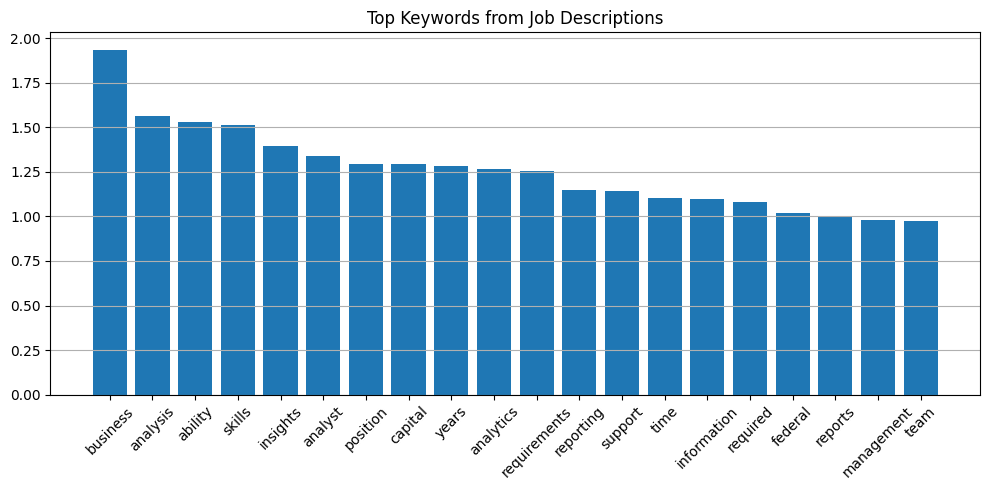

In [ ]:
import matplotlib.pyplot as plt

words = [w for w, _ in top_keywords]
scores = [s for _, s in top_keywords]

plt.figure(figsize=(10, 5))
plt.bar(words, scores)
plt.title("Top Keywords from Job Descriptions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**View Basic Job Stats**

In [ ]:
print("Total Jobs:", len(df))
print("Unique Titles:", df['Job Title'].nunique())
print("Unique Companies:", df['Company'].nunique())
print("Top Companies hiring:")
print(df['Company'].value_counts().head(10))



Total Jobs: 30
Unique Titles: 27
Unique Companies: 29
Top Companies hiring:
Company
Capital One            2
Strategi Consulting    1
American University    1
Amentum                1
Lensa                  1
CACI                   1
TieTalent              1
Weris                  1
The Washington Post    1
evolverinc             1
Name: count, dtype: int64


**Job Titles Frequency**

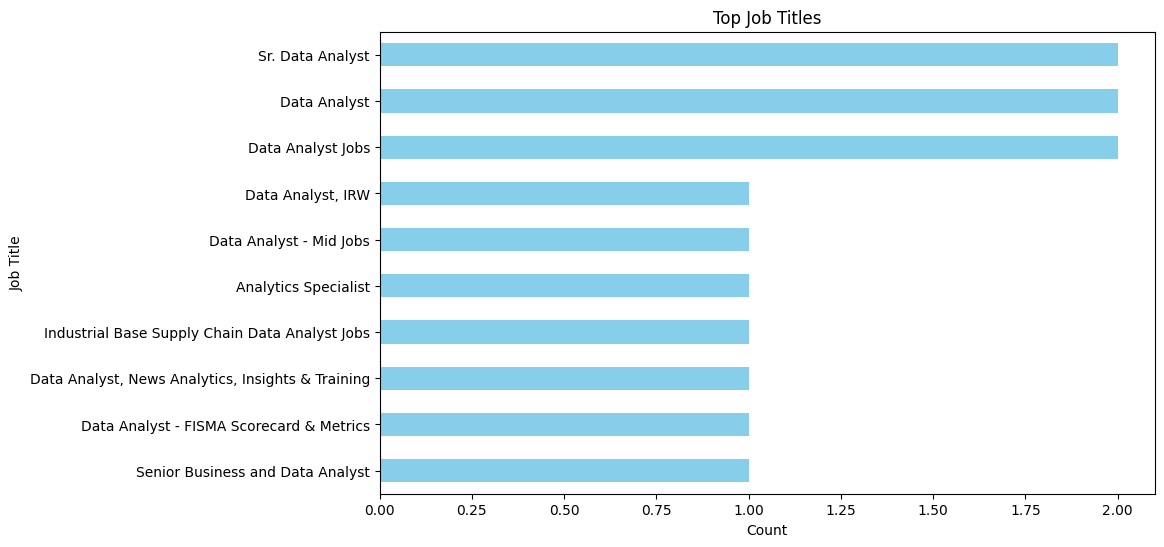

In [ ]:
import matplotlib.pyplot as plt

top_titles = df['Job Title'].value_counts().head(10)
top_titles.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top Job Titles")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


**Remote vs On-site Jobs**

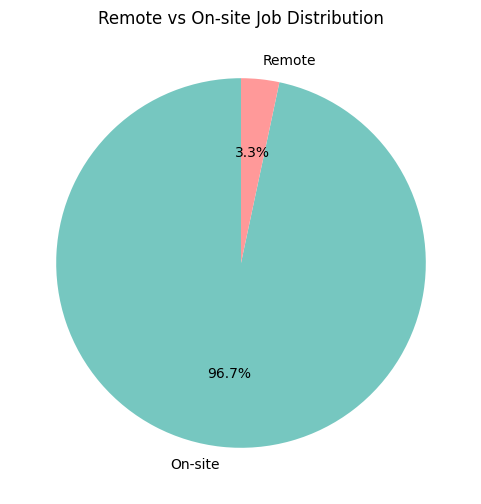

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Clean + Map remote job labels
df['Remote'] = df['Remote'].astype(str)

# Replace "True"/"False"/"None" with readable labels
df['Remote Status'] = df['Remote'].map({
    'True': 'Remote',
    'False': 'On-site',
    'None': 'Unknown'
})

# Step 2: Count & plot
remote_counts = df['Remote Status'].value_counts()

# Step 3: Pie chart
remote_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6,6),
    colors=['#76c7c0', '#ff9999', '#d3d3d3']
)

plt.title("Remote vs On-site Job Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()


In [ ]:
df['Remote'].value_counts(dropna=False)


,count
Remote,
False,29
True,1


**Jobs by Location**

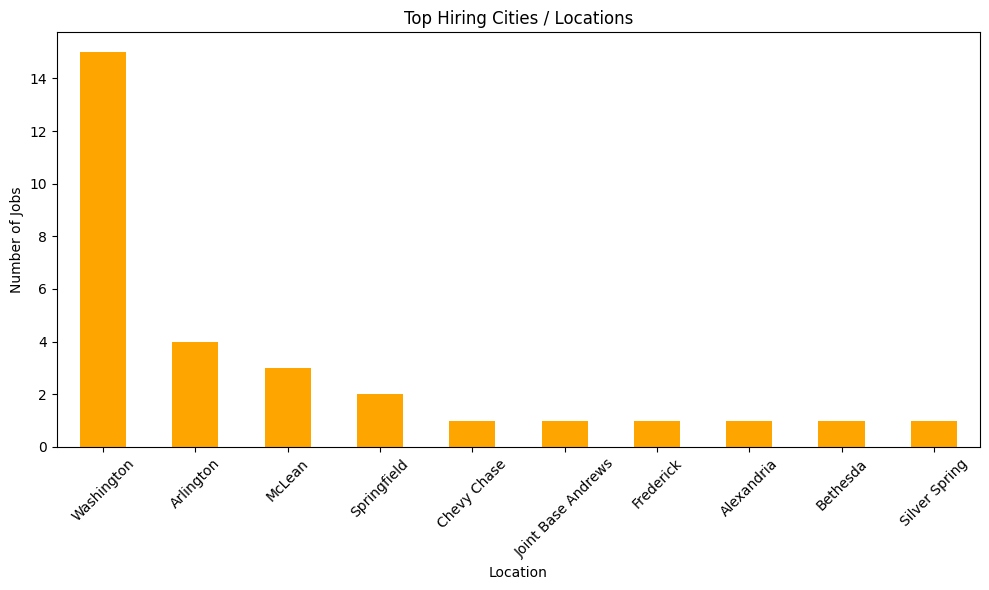

In [ ]:
top_locations = df['Location'].value_counts().head(10)
top_locations.plot(kind='bar', color='orange', figsize=(10,6))
plt.title("Top Hiring Cities / Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


**Jobs by Age (Posted Days Ago)**

In [ ]:
if 'Posted Days Ago' in df.columns:
    df['Posted Days Ago'].hist(bins=15, color='lightgreen', figsize=(10,6))
    plt.title("Job Post Age Distribution")
    plt.xlabel("Days Ago")
    plt.ylabel("Number of Jobs")
    plt.show()
else:
    print("No 'Posted Days Ago' column found.")


No 'Posted Days Ago' column found.


**Word Cloud of Job Descriptions (Optional, Fancy Visual)**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


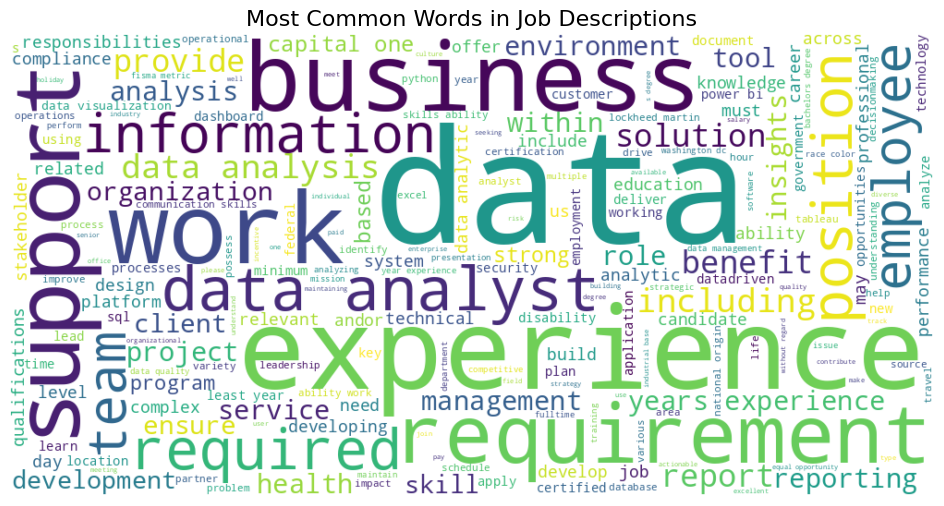

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string

def clean_text(text):
    if pd.isnull(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Simple split instead of word_tokenize
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    return ' '.join(words)

# Apply the cleaned version again
df['Cleaned Description'] = df['Job Description'].apply(clean_text)

# Then re-run your word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Cleaned Description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Job Descriptions", fontsize=16)
plt.show()


In [ ]:
# 1. General software roles
query = "software engineer"

# 2. Business roles
query = "product manager"

# 3. Non-technical
query = "project coordinator"

# 4. Data-adjacent but not core
query = "marketing analyst"


In [ ]:
f"/search?query={query.replace(' ', '%20')}&page=1&num_pages=1&country=us&date_posted=all"


'/search?query=marketing%20analyst&page=1&num_pages=1&country=us&date_posted=all'

In [ ]:
df['Job Title'].value_counts().head(20)


,count
Job Title,
Sr. Data Analyst,2
Data Analyst,2
Data Analyst Jobs,2
"Data Analyst, IRW",1
Data Analyst - Mid Jobs,1
Analytics Specialist,1
Industrial Base Supply Chain Data Analyst Jobs,1
"Data Analyst, News Analytics, Insights & Training",1
Data Analyst - FISMA Scorecard & Metrics,1


In [ ]:
non_data_df = df[~df['Job Title'].str.contains("data", case=False)]
non_data_df[['Job Title', 'Job Description']].head()


,Job Title,Job Description
5,Analytics Specialist,About\n\nTrack and analyze performance data ac...


In [ ]:
df['is_data_job'] = df['Job Title'].str.contains("data", case=False).astype(int)
df['is_data_job'].value_counts(normalize=True)


,proportion
is_data_job,
1,0.966667
0,0.033333


In [ ]:
job_roles = [
    "software engineer",
    "project manager",
    "marketing specialist",
    "business analyst",
    "ux designer",
    "cloud engineer",
    "operations manager",
    "cybersecurity analyst"
]

In [ ]:
f"/search?query={query}&page=1&num_pages=1&country=us&date_posted=all"

'/search?query=marketing analyst&page=1&num_pages=1&country=us&date_posted=all'

In [ ]:
import http.client
import json
import pandas as pd
import time
from urllib.parse import quote  # ✅ ADD THIS

# Step 1: Define roles you want to search
job_roles = [
    "data analyst", "software engineer", "project manager",
    "marketing specialist", "business analyst", "ux designer",
    "cloud engineer", "cybersecurity analyst"
]

# Step 2: Create an empty DataFrame
all_jobs = pd.DataFrame()

# Step 3: Loop through each role and fetch data
for role in job_roles:
    encoded_role = quote(role)  # ✅ ENCODE SPACES
    print(f"🔍 Fetching role: {role}...")

    conn = http.client.HTTPSConnection("jsearch.p.rapidapi.com")

    headers = {
        'x-rapidapi-key': "3fbaa47488msh660a07cdf52b73ap143978jsn9af97fac883b",
        'x-rapidapi-host': "jsearch.p.rapidapi.com"
    }

    query = f"/search?query={encoded_role}&page=1&num_pages=1&country=us&date_posted=all"

    try:
        conn.request("GET", query, headers=headers)
        res = conn.getresponse()
        data = res.read()
        results = json.loads(data.decode("utf-8"))

        if results.get('data'):
            df = pd.json_normalize(results['data'])
            df['RoleQueried'] = role
            all_jobs = pd.concat([all_jobs, df], ignore_index=True)
        else:
            print(f"⚠️ No data found for role: {role}")

    except Exception as e:
        print(f"❌ Error fetching {role}: {e}")

    time.sleep(1.5)  # Pause to respect API limits

# Step 5: Show summary
print(f"✅ Total jobs fetched: {len(all_jobs)}")
all_jobs[['job_title', 'employer_name', 'RoleQueried']].head()


🔍 Fetching role: data analyst...
🔍 Fetching role: software engineer...
🔍 Fetching role: project manager...
🔍 Fetching role: marketing specialist...


/tmp/ipython-input-45-1223629812.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_jobs = pd.concat([all_jobs, df], ignore_index=True)


🔍 Fetching role: business analyst...
🔍 Fetching role: ux designer...
🔍 Fetching role: cloud engineer...
🔍 Fetching role: cybersecurity analyst...
✅ Total jobs fetched: 80


,job_title,employer_name,RoleQueried
0,Data Analyst Associate (early career) - Data R...,Lensa,data analyst
1,Senior Business and Data Analyst,Strategi Consulting,data analyst
2,"Data Analyst, IRW",American University,data analyst
3,Data Analyst - Mid Jobs,Amentum,data analyst
4,Industrial Base Supply Chain Data Analyst Jobs,CACI,data analyst


**See Job Count Per Role**

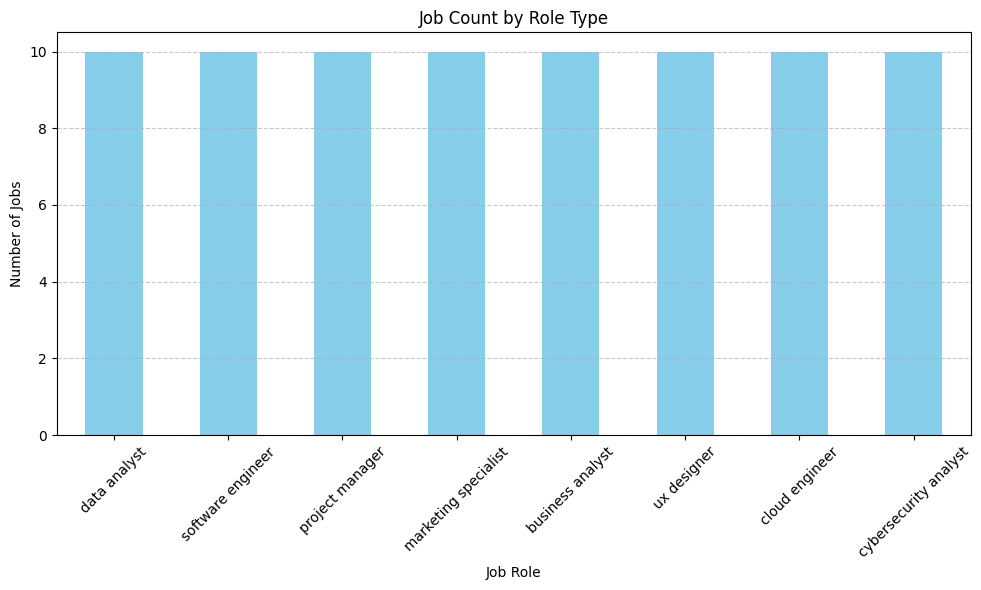

In [ ]:
import matplotlib.pyplot as plt

role_counts = all_jobs['RoleQueried'].value_counts()

plt.figure(figsize=(10,6))
role_counts.plot(kind='bar', color='skyblue')
plt.title("Job Count by Role Type")
plt.xlabel("Job Role")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Top Hiring Companies**

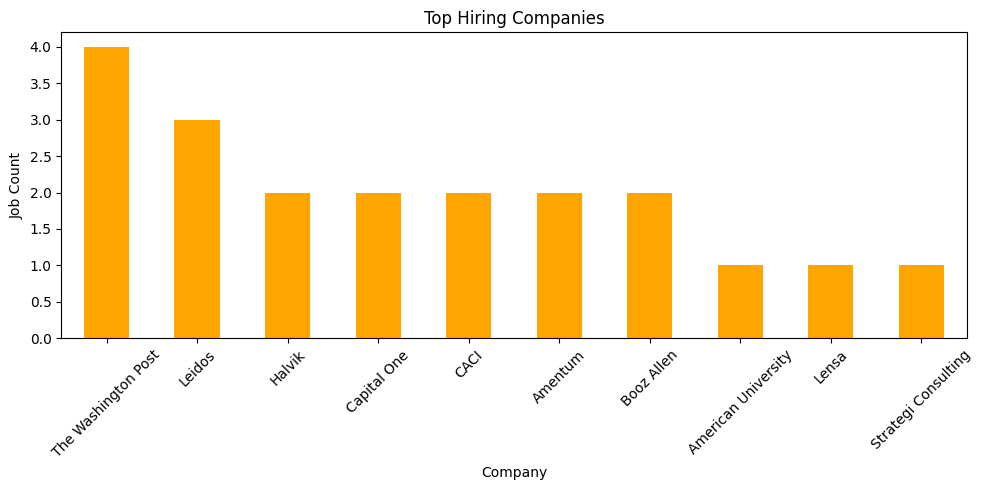

In [ ]:
top_companies = all_jobs['employer_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_companies.plot(kind='bar', color='orange')
plt.title("Top Hiring Companies")
plt.xlabel("Company")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Job Location Frequency**

In [ ]:
all_jobs['job_city'].value_counts().head(10)

,count
job_city,
Washington,37
Arlington,14
Bethesda,6
McLean,6
Rockville,2
Chevy Chase,1
Springfield,1
Alexandria,1
Camp Springs,1


In [ ]:
all_jobs.to_csv("multi_role_jobs.csv", index=False)
print("✅ All job data saved to multi_role_jobs.csv")

✅ All job data saved to multi_role_jobs.csv


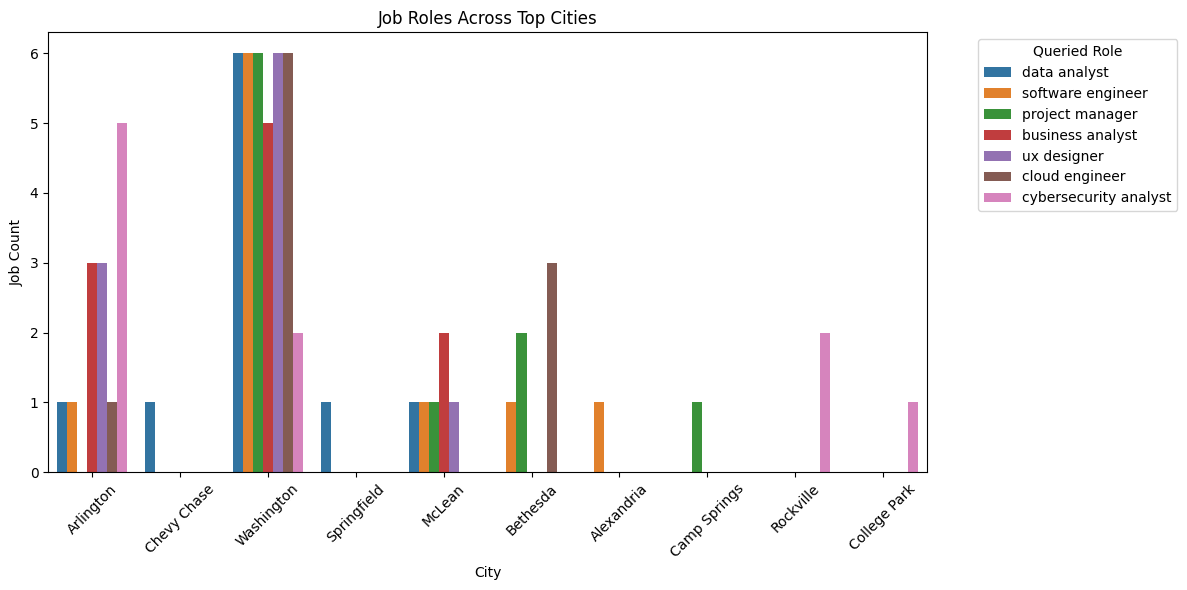

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_locations = all_jobs['job_city'].value_counts().head(10).index
filtered = all_jobs[all_jobs['job_city'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, x='job_city', hue='RoleQueried')
plt.title("Job Roles Across Top Cities")
plt.xlabel("City")
plt.ylabel("Job Count")
plt.legend(title="Queried Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

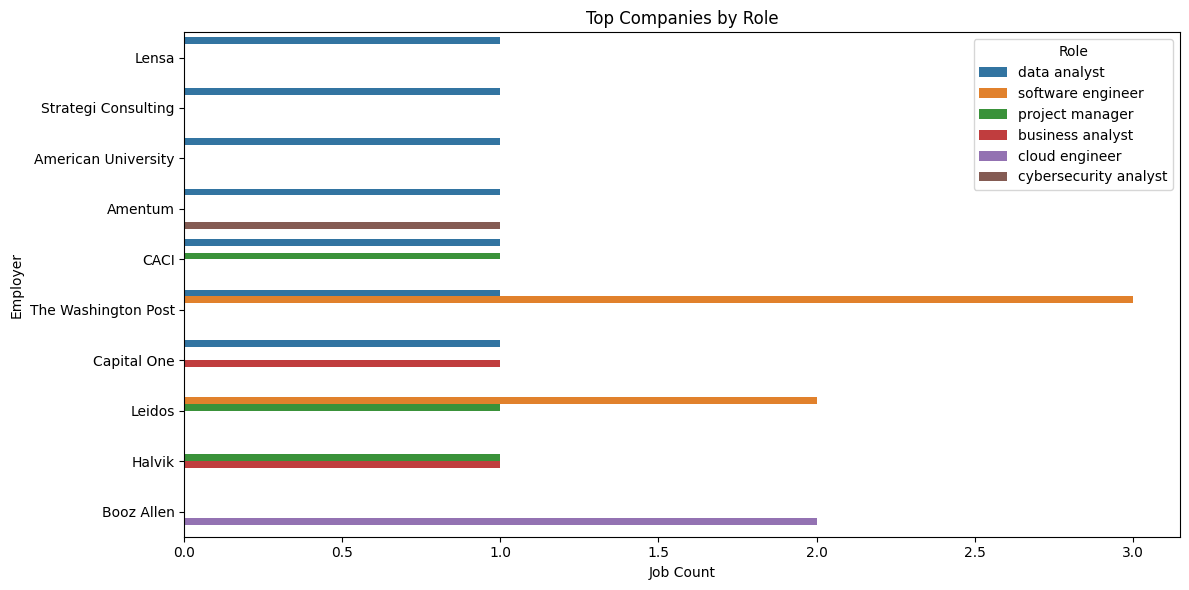

In [ ]:
top_companies = all_jobs['employer_name'].value_counts().head(10).index
filtered = all_jobs[all_jobs['employer_name'].isin(top_companies)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, y='employer_name', hue='RoleQueried')
plt.title("Top Companies by Role")
plt.xlabel("Job Count")
plt.ylabel("Employer")
plt.legend(title="Role")
plt.tight_layout()
plt.show()

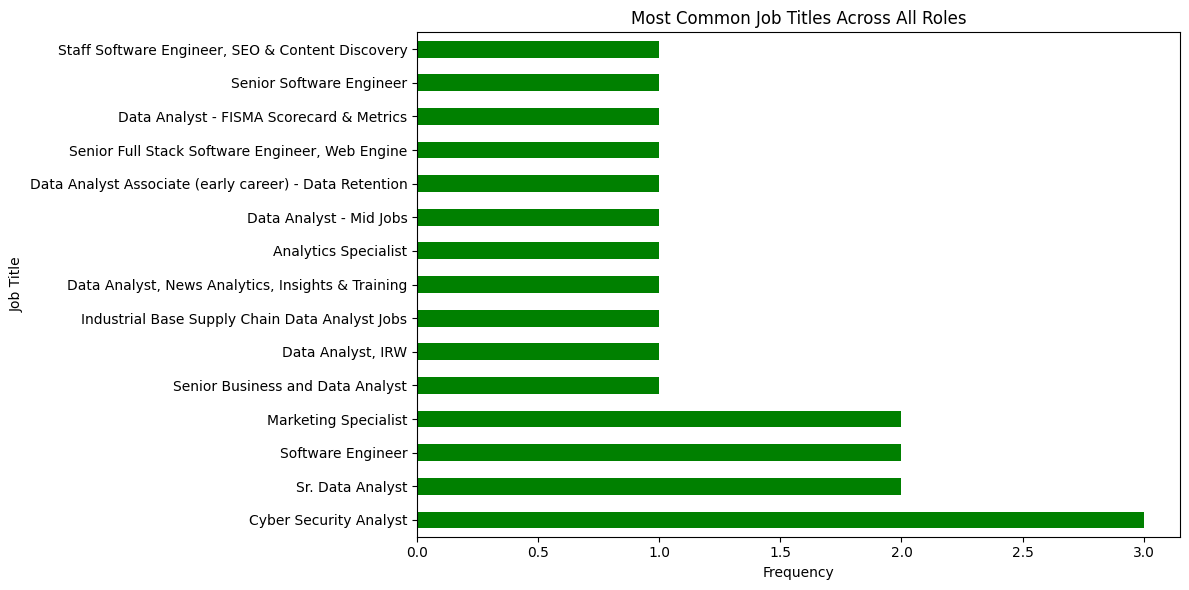

In [ ]:
# Combine common job titles for top roles
top_titles = all_jobs['job_title'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_titles.plot(kind='barh', color='green')
plt.title("Most Common Job Titles Across All Roles")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

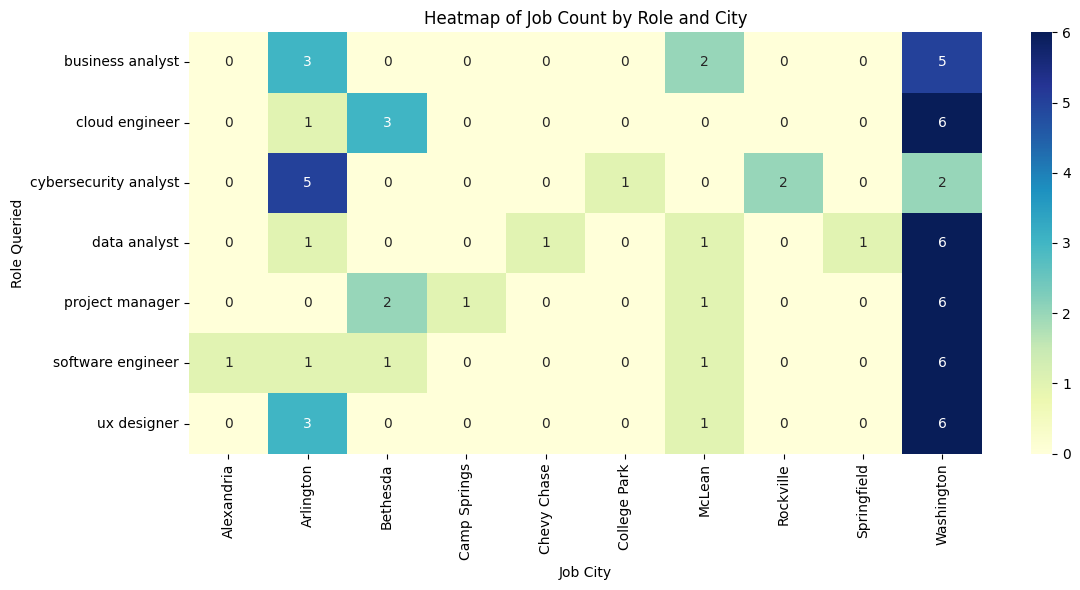

In [ ]:
# Pivot table
heatmap_data = pd.pivot_table(
    all_jobs,
    values='job_id',  # or any column
    index='RoleQueried',
    columns='job_city',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Job Count by Role and City")
plt.ylabel("Role Queried")
plt.xlabel("Job City")
plt.tight_layout()
plt.show()

**Skill Clustering & Dashboard Deployment**

**Convert Job Descriptions into Vectors (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X = tfidf.fit_transform(all_jobs['Cleaned Description'].fillna(""))

print(f"Shape of TF-IDF matrix: {X.shape}")  # Rows = jobs, columns = keywords

KeyError: 'Cleaned Description'

In [ ]:
print(all_jobs.columns)

Index(['job_id', 'job_title', 'employer_name', 'employer_logo',
       'employer_website', 'job_publisher', 'job_employment_type',
       'job_employment_types', 'job_apply_link', 'job_apply_is_direct',
       'apply_options', 'job_description', 'job_is_remote', 'job_posted_at',
       'job_posted_at_timestamp', 'job_posted_at_datetime_utc', 'job_location',
       'job_city', 'job_state', 'job_country', 'job_latitude', 'job_longitude',
       'job_benefits', 'job_google_link', 'job_salary', 'job_min_salary',
       'job_max_salary', 'job_salary_period', 'job_onet_soc',
       'job_onet_job_zone', 'job_highlights.Qualifications',
       'job_highlights.Benefits', 'job_highlights.Responsibilities',
       'RoleQueried'],
      dtype='object')


**Create Cleaned Description Column**

In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean text without NLTK
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Split into words
    words = text.split()

    # Remove stopwords
    cleaned = [word for word in words if word not in ENGLISH_STOP_WORDS]

    return ' '.join(cleaned)


In [ ]:
# Check your exact column name
print(all_jobs.columns)

# Use the correct column name here
all_jobs['Cleaned Description'] = all_jobs['job_description'].apply(clean_text)

Index(['job_id', 'job_title', 'employer_name', 'employer_logo',
       'employer_website', 'job_publisher', 'job_employment_type',
       'job_employment_types', 'job_apply_link', 'job_apply_is_direct',
       'apply_options', 'job_description', 'job_is_remote', 'job_posted_at',
       'job_posted_at_timestamp', 'job_posted_at_datetime_utc', 'job_location',
       'job_city', 'job_state', 'job_country', 'job_latitude', 'job_longitude',
       'job_benefits', 'job_google_link', 'job_salary', 'job_min_salary',
       'job_max_salary', 'job_salary_period', 'job_onet_soc',
       'job_onet_job_zone', 'job_highlights.Qualifications',
       'job_highlights.Benefits', 'job_highlights.Responsibilities',
       'RoleQueried'],
      dtype='object')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(all_jobs['Cleaned Description'])

print(f"TF-IDF shape: {X.shape}")


TF-IDF shape: (80, 500)


CLUSTER JOB ROLES :
Apply KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

k = 5  # You can tune this later (try 3–8)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Attach cluster labels to your jobs
all_jobs['Cluster'] = clusters

print("✅ Clustering done. Here’s how many jobs per cluster:")
print(all_jobs['Cluster'].value_counts())

✅ Clustering done. Here’s how many jobs per cluster:
Cluster
0    21
4    19
3    18
2    12
1    10
Name: count, dtype: int64


**Seeing Top Keywords Per Cluster**

In [ ]:

import numpy as np

terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("📌 Top Keywords in Each Cluster:")
for i in range(k):
    print(f"\nCluster {i}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))

📌 Top Keywords in Each Cluster:

Cluster 0:
project, marketing, experience, management, team, manager, work, software, manage, skills

Cluster 1:
design, user, ux, designer, uiux, research, experience, usability, product, designs

Cluster 2:
experience, post, aws, infrastructure, work, cloud, code, content, benefits, engineers

Cluster 3:
security, cloud, experience, cybersecurity, cyber, risk, systems, support, aws, azure

Cluster 4:
data, business, experience, analysis, requirements, capital, analyst, work, management, information


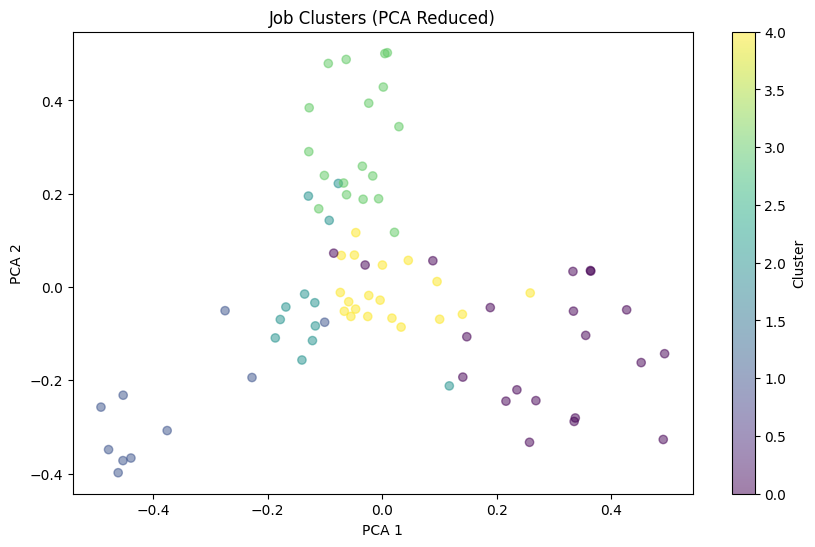

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Job Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


FileNotFoundError: Cannot find file: cleaned_jobs.csv